# Problem 1

## General functions

In [1]:
def leapstep(x, v, dt, accel):
    """LEAPSTEP: take one step using the leapfrog integrator, formulated
    as a mapping from t to t + dt.  WARNING: this integrator is not
    accurate unless the timestep dt is fixed from one call to another.

    Args:
        x (np.array): positions of all points
        v (np.array): velocities of all points
        dt (float): timestep for integration
        accel (function): acceleration function
    """
    a = accel(x)  # call acceleration code

    v = v + 0.5 * dt * a  # advance vel by half-step
    x = x + dt * v  # advance pos by full-step

    a = accel(x)  # call acceleration code

    v = v + 0.5 * dt * a  # and complete vel. step
    return x, v

## Part a

In [2]:
import numpy as np
def accel_x(x):
    """ACCEL: compute accelerations for harmonic oscillator(s)

    Args:
        a (np.array): accelerations of points
        x (np.array): positions of points
    """
    a = -x
    return a


In [3]:
def get_x_v_vs_t(x_initial, v_initial, accel):
    """run leapfrog integrator for a given initial condition and acceleration function

    Args:
        x_initial (float): initial position
        v_initial (float): intial velocity
        accel (function): acceleraton function

    Returns:
        x_vs_t (np.array): positions of points vs time
        v_vs_t (np.array): velocities of points vs time
    """
    # first, set up initial conditions
    x = x_initial  # set initial position
    v = v_initial  # set initial velocity
    tnow = 0.0  # set initial time

    # next, set integration parameters
    mstep = 256  # number of steps to take
    dt = 1.0 / 32.0  # timestep for integration

    x_vs_t = np.zeros((mstep))
    v_vs_t = np.zeros((mstep))
    t = np.zeros((mstep))

    # now, loop performing integration
    for nstep in range(mstep):  # loop mstep times in all
        x, v = leapstep(x, v, dt, accel)  # take integration step
        tnow = tnow + dt  # and update value of time
        x_vs_t[nstep] = x
        v_vs_t[nstep] = v
        t[nstep] = tnow

    return x_vs_t, v_vs_t, t


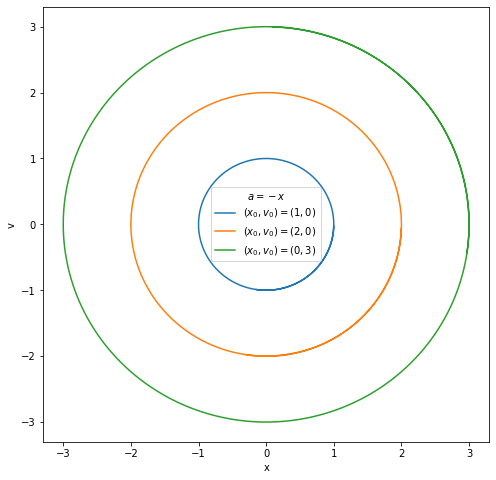

In [4]:
import matplotlib.pyplot as plt

x0_a, v0_a, t0_a = get_x_v_vs_t(1, 0, accel_x)
x1_a, v1_a, t1_a = get_x_v_vs_t(2, 0, accel_x)
x2_a, v2_a, t2_a = get_x_v_vs_t(0, 3, accel_x)

plt.figure(figsize=(8, 8))
plt.plot(x0_a, v0_a, label="$(x_0, v_0) = (1, 0)$")
plt.plot(x1_a, v1_a, label="$(x_0, v_0) = (2, 0)$")
plt.plot(x2_a, v2_a, label="$(x_0, v_0) = (0, 3)$")
plt.xlabel('x')
plt.ylabel('v')
plt.legend(title="$a=-x$")
plt.savefig("problem1a.png")

## Part b

In [5]:
def accel_sinx(x):
    """ACCEL: compute accelerations

    Args:
        x (np.array): positions of points
    """
    a = -np.sin(x)
    return a


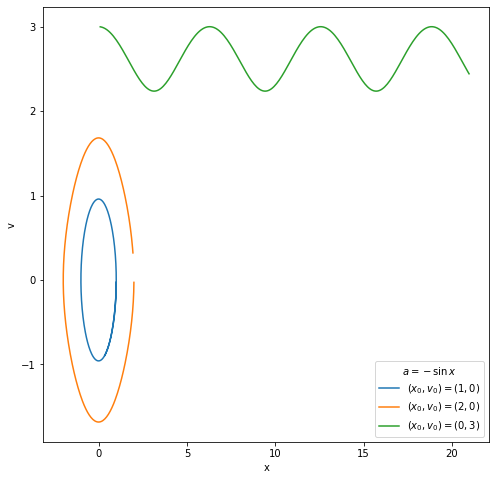

In [6]:
x0_b, v0_b, t0_b = get_x_v_vs_t(1, 0, accel_sinx)
x1_b, v1_b, t1_b = get_x_v_vs_t(2, 0, accel_sinx)
x2_b, v2_b, t2_b = get_x_v_vs_t(0, 3, accel_sinx)

plt.figure(figsize=(8, 8))
plt.plot(x0_b, v0_b, label="$(x_0, v_0) = (1, 0)$")
plt.plot(x1_b, v1_b, label="$(x_0, v_0) = (2, 0)$")
plt.plot(x2_b, v2_b, label="$(x_0, v_0) = (0, 3)$")
plt.xlabel('x')
plt.ylabel('v')
plt.legend(title="$a = -\sin x$")
plt.savefig("problem1b.png")

## Part c

/tmp/ipykernel_7545/1532318952.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line0.set_data(x0_b[i], v0_b[i])
/tmp/ipykernel_7545/1532318952.py:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line1.set_data(x1_b[i], v1_b[i])
/tmp/ipykernel_7545/1532318952.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line2.set_data(x2_b[i], v2_b[i])
/tmp/ipykernel_7545/1532318952.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line0.set_data(x0_b[i], v0_b[i])
/tmp/ipykernel_7545/1532318952.py:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor relea

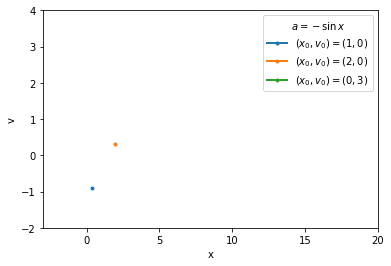

In [7]:
from matplotlib.animation import FuncAnimation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-3, 20), ylim=(-2, 4), xlabel="x", ylabel="v")
line0, = ax.plot([], [], lw=2, marker=".", label="$(x_0, v_0) = (1, 0)$")
line1, = ax.plot([], [], lw=2, marker=".", label="$(x_0, v_0) = (2, 0)$")
line2, = ax.plot([], [], lw=2, marker=".", label="$(x_0, v_0) = (0, 3)$")
plt.legend(title="$a = -\sin x$")


# initialization function: plot the background of each frame
def init():
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return line0, line0, line2

# animation function.  This is called sequentially
# in this case, we will plot the solution from t=0 to the current time step
def animate(i):
    line0.set_data(x0_b[i], v0_b[i])
    line1.set_data(x1_b[i], v1_b[i])
    line2.set_data(x2_b[i], v2_b[i])
    return line0, line1, line2

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=len(x0_b), interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
anim.save('problem1c.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# save the animation as a gif.
anim.save('problem1c.gif', fps=30)

In [8]:
# Display .mp4 video
from IPython.display import Video
Video(data="problem1c.mp4")

## Part d

2D plots already made, so just make 3D plot

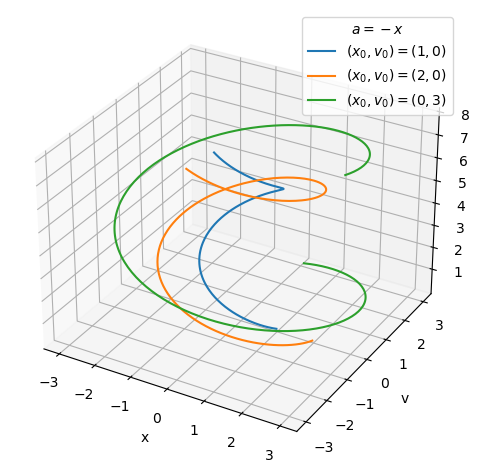

In [9]:
# Make 3D plot x0 vs y0 vs t0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x0_a, v0_a, t0_a, label="$(x_0, v_0) = (1, 0)$")
ax.plot(x1_a, v1_a, t1_a, label="$(x_0, v_0) = (2, 0)$")
ax.plot(x2_a, v2_a, t2_a, label="$(x_0, v_0) = (0, 3)$")
ax.set_xlabel('x')
ax.set_ylabel('v')
ax.set_zlabel('t')
plt.legend(title="$a = -x$")
plt.tight_layout()
plt.savefig("problem1d_a.png")

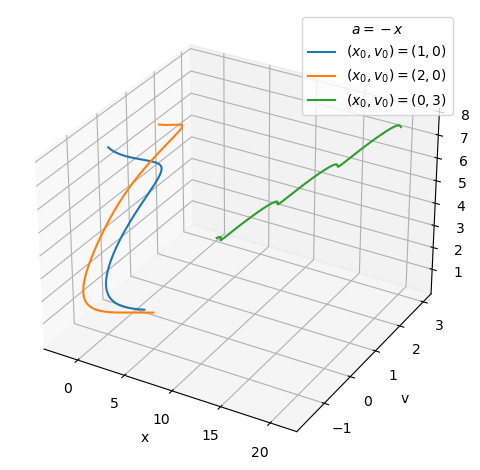

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x0_b, v0_b, t0_b, label="$(x_0, v_0) = (1, 0)$")
ax.plot(x1_b, v1_b, t1_b, label="$(x_0, v_0) = (2, 0)$")
ax.plot(x2_b, v2_b, t2_b, label="$(x_0, v_0) = (0, 3)$")
ax.set_xlabel('x')
ax.set_ylabel('v')
ax.set_zlabel('t')
plt.legend(title="$a = -x$")
plt.tight_layout()
plt.savefig("problem1d_b.png")